<a href="https://colab.research.google.com/github/Sunilkumar414674/CODSOFTtask5/blob/main/CODSOFTtask5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Step 1: Load transactions data
credit_data= pd.read_csv('/content/codsofttask5.csv')

# Inspect the data
print(credit_data.head())





   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# to get rows and columns of Credit Card Fraud Detection data
credit_data.shape

(284807, 31)

In [ ]:
# data preprocessing
# for Checking the missing values in Credit Card Fraud Detection data
print(credit_data.isnull().sum())



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Normalizing  the data
# as amount is in rupees, to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_data['Amount'] = scaler.fit_transform(credit_data[['Amount']])

In [ ]:
# Separate features and labels of data
X = credit_data.drop(columns=['Class'])
X
y = credit_data['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
# to  Handle class imbalance in data.we use SMOTE (Synthetic Minority Over-sampling Technique)
#SMOTE is used for oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_new, y_new = smote.fit_resample(X, y)

In [ ]:
# Split the  Credit Card Fraud Detection dataset
from sklearn.model_selection import train_test_split

credit_X_train,credit_X_test,credit_y_train,credit_y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)



In [ ]:
# Logistic Regression
# to Train a Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(credit_X_train, credit_y_train)


LogisticRegression()

In [ ]:
# Logistic Regression Classification Report
from sklearn.metrics import classification_report
y_pred_log_reg = log_reg.predict(credit_X_test)
print("Logistic Regression Classification Report:")
print(classification_report(credit_y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85149
           1       0.98      0.96      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



**1.Precision:**

  Class 0 (non-fraudulent): 0.97 and
  Class 1 (fraudulent): 0.98

 This indicates that 97% of the predicted non-fraudulent transactions are actually non-fraudulent, and 98% of the predicted fraudulent transactions are actually fraudulent.

**2.Recall:**

  Class 0: 0.98  and  Class 1: 0.96

This means that the model correctly identifies 98% of actual non-fraudulent transactions and 96% of actual fraudulent transactions.

**3.F1-Score:**

  Class 0: 0.97 and Class 1: 0.97

The F1-score is 0.97, indicating a well-balanced model.

**4.Support:**

  Class 0: 85149 and Class 1: 85440
 These values represent the number of occurrences of each class in the test dataset.

**5.Accuracy: 0.97**
   
Overall, the model correctly classifies 97% of the transactions.

In [ ]:
#  to Calculate ROC-AUC of Credit Card Fraud Detection data
from sklearn.metrics import roc_auc_score
roc_auc_log_reg = roc_auc_score(credit_y_test, log_reg.predict_proba(credit_X_test)[:, 1])

print(f"ROC-AUC Score for Logistic Regression: {roc_auc_log_reg}")

ROC-AUC Score for Logistic Regression: 0.9933501666944655


The ROC-AUC score for the logistic regression model is 0.9933501666944655. This high ROC-AUC score indicates excellent performance of the model in distinguishing between fraudulent and non-fraudulent transactions.


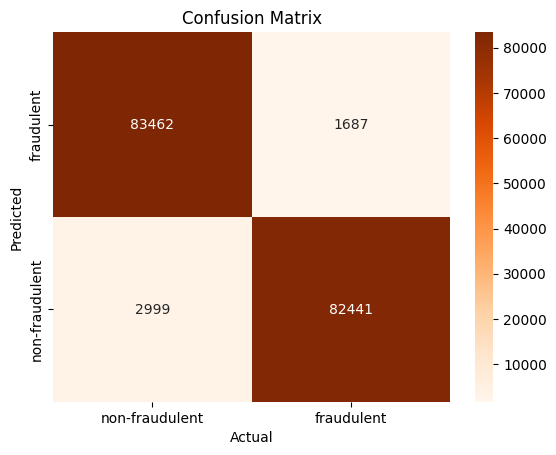

Confusion Matrix for Logistic Regression:
[[83462  1687]
 [ 2999 82441]]


In [ ]:
# Confusion matrix of Credit Card Fraud Detection data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix_log_reg = confusion_matrix(credit_y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(credit_y_test, y_pred_rf)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Oranges', xticklabels=['non-fraudulent','fraudulent'], yticklabels=['fraudulent','non-fraudulent'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_log_reg)


**1.True Positives (TP)**: 82,441

The number of correctly identified fraudulent transactions.

**2.True Negatives (TN)**: 83,462

The number of correctly identified non-fraudulent transactions.

**3.False Positives (FP)**: 1,687

The number of non-fraudulent transactions incorrectly classified as fraudulent.

**4.False Negatives (FN)**: 2,999

The number of fraudulent transactions incorrectly classified as non-fraudulent.

In [ ]:
# Random Forest
# to Train a Random Forest classification algorithm Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(credit_X_train,credit_y_train)



RandomForestClassifier()

In [ ]:
# Random Forest Classification Report
from sklearn.metrics import classification_report
y_pred_rf = rf_clf.predict(credit_X_test)
print("Random Forest Classification Report:")
print(classification_report(credit_y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



**1.Precision:**

  Class 0 (non-fraudulent): 1.00 and Class 1 (fraudulent): 1.00

This indicates that 100% of the predicted non-fraudulent and fraudulent transactions are correct.

**2.Recall:**

Class 0: 1.00 and Class 1: 1.00

 This means that the model correctly identifies 100% of actual non-fraudulent and fraudulent transactions.

**3.F1-Score:**

 Class 0: 1.00 and Class 1: 1.00

The F1-score is perfect for both classes, indicating no trade-off between precision and recall.

**4.Support:**

Class 0: 85149 and Class 1: 85440

These values represent the number of occurrences of each class in the test dataset.

**5.Accuracy: 1.00**

The model correctly classifies 100% of the transactions.

In [ ]:
# to Calculate ROC-AUC of Credit Card Fraud Detection data
from sklearn.metrics import roc_auc_score
roc_auc_rf = roc_auc_score(credit_y_test, rf_clf.predict_proba(credit_X_test)[:, 1])

print(f"ROC-AUC Score for Random Forest: {roc_auc_rf}")



ROC-AUC Score for Random Forest: 0.9999920368439408


The ROC-AUC score for the Random Forest model is 0.9999920368439408. This near-perfect ROC-AUC score indicates that the model is extremely effective at distinguishing between fraudulent and non-fraudulent transactions.

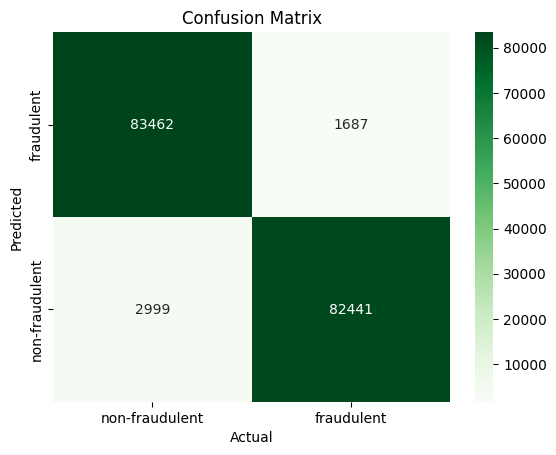

Confusion Matrix for Random Forest:
[[85132    17]
 [    0 85440]]


In [ ]:
# Confusion matrix Credit Card Fraud Detection data
from sklearn.metrics import confusion_matrix
conf_matrix_log_reg = confusion_matrix(credit_y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(credit_y_test, y_pred_rf)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Greens', xticklabels=['non-fraudulent','fraudulent'], yticklabels=['fraudulent','non-fraudulent'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

**1.True Positives (TP):** 85,440

 The number of correctly identified fraudulent transactions.

**2.True Negatives (TN):** 85,132

The number of correctly identified non-fraudulent transactions.

**3.False Positives (FP):** 17

The number of non-fraudulent transactions incorrectly classified as fraudulent.

**4.False Negatives (FN):** 0

The number of fraudulent transactions incorrectly classified as non-fraudulent.